In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import recordlinkage

In [4]:
data1=pd.read_csv("restaurants_L2.csv")
data1.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [5]:
data2=pd.read_csv("restaurants_L2_dirty.csv")
data2.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [6]:
print("The shape of dataset1: ", data1.shape)
print("The shape of dataset2: ", data2.shape)

The shape of dataset1:  (336, 6)
The shape of dataset2:  (82, 6)


In [7]:
print("The column names of the dataset1: ", data1.columns)
print("The column names of the dataset2: ", data2.columns)

The column names of the dataset1:  Index(['Unnamed: 0', 'name', 'addr', 'city', 'phone', 'type'], dtype='object')
The column names of the dataset2:  Index(['Unnamed: 0', 'name', 'addr', 'city', 'phone', 'type'], dtype='object')


#### Both DataFrames are about resturants, collected from ***different rescources*** with the same column names, But the data may be collected manually and ***prone to typos*** or ***differently named***.
#### As we can see there is ***no common unqiue identifies*** or ***consistent IDs*** between both dataframes. the 'Unnamed: 0' column just pick as a ***zero indexed*** to the rows in every dataframe individually and does't refere to ID for the resturant which means that and we can't count on to use ***regular join() or merge()*** functions.

In [8]:
# let's drop 'Unamed: 0' column to avoid conflicts
data1.drop('Unnamed: 0', axis=1, inplace=True)
data2.drop('Unnamed: 0', axis=1, inplace=True)

#### Let's rename the ***addr*** column to ***address*** for better consistancy.

In [9]:
data1 = data1.rename(columns= {"addr": "address"})
data2 = data2.rename(columns= {"addr": "address"})

In [10]:
# Let's now more information about both data sets. 
data1.info()
print("\n  -------------- \n")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     336 non-null    object
 1   address  336 non-null    object
 2   city     336 non-null    object
 3   phone    336 non-null    int64 
 4   type     336 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.2+ KB

  -------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     82 non-null     object
 1   address  82 non-null     object
 2   city     82 non-null     object
 3   phone    82 non-null     int64 
 4   type     82 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.3+ KB


#### 1- ***data cleaning and Standardization***.
#### make sure the ***datatype is correct*** and in ***the same format*** the involves ***removing all whitespaces*** and converting ***all letters into lower or upper cases***. to be appropriate and ready to generate pairs

In [11]:
# we create this function to convert columns to string. So, we can deal with and find similarity match.
def string(col_name):
  data1[col_name]=data1[col_name].astype("string")
  data2[col_name]=data2[col_name].astype("string")

string("name")
string("address")
string("city")
string("type")

In [13]:
data1["type"].value_counts()

american        137
italian          78
asian            72
coffeebar        25
mexican           9
southern          8
steakhouses       5
southwestern      1
cajun             1
Name: type, dtype: Int64

### let's collapse type into small categories

In [14]:
# due to southwestern, cajun, southern, steakhouses resturants is american resturants
mapping={"southwestern":"american",
         "cajun":"american",
         "steakhouses": "american",
         "southern": "american"}
data1["type"]=data1["type"].replace(mapping)

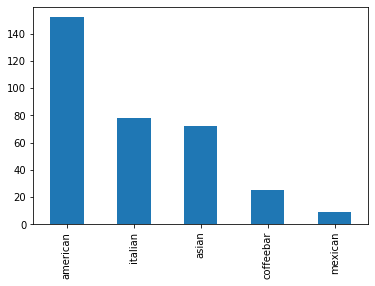

In [16]:
data1["type"].value_counts().plot(kind="bar")
plt.show()

In [160]:
data2["type"].value_counts()

american            20
italian              7
californian          5
coffee shops         5
asian                4
diners               3
mexican              3
hot dogs             3
delis                3
hamburgers           3
seafood              2
noodle shops         2
pacific new wave     2
pizza                1
cajun/creole         1
vietnamese           1
southern/soul        1
japanese             1
eclectic             1
chinese              1
american ( new )     1
middle eastern       1
continental          1
steakhouses          1
french ( new )       1
health food          1
mexican/tex-mex      1
coffeebar            1
russian              1
fast food            1
chicken              1
desserts             1
indonesian           1
Name: type, dtype: Int64

In [17]:
# japanese, indonesian, chinese, vietnamese we can collape them into *asian*
# coffee shops, noodle shops we can collapse them into *coffeebar*
#hot dogs, hamburgers, pizza, chicken, delis collapse them into *fast food*
# californian, american ( new ), cajun/creole, southern/soul, steakhouses we can collapse them into *american*

mapping = {"japanese":"asian", "indonesian":"asian", "chinese":"asian", "vietnamese":"asian",
"coffee shops":"coffeebar", "noodle shops":"coffeebar",
"hot dogs": "fast food", "hamburgers":"fast food", "pizza":"fast food", "chicken":"fast food", "delis":"fast food",
"californian":"american", "cajun/creole":"american", "southern/soul":"american", "steakhouses": "american", "american ( new )":"american",
"mexican/tex-mex":"mexican"}

data2["type"]=data2["type"].replace(mapping)

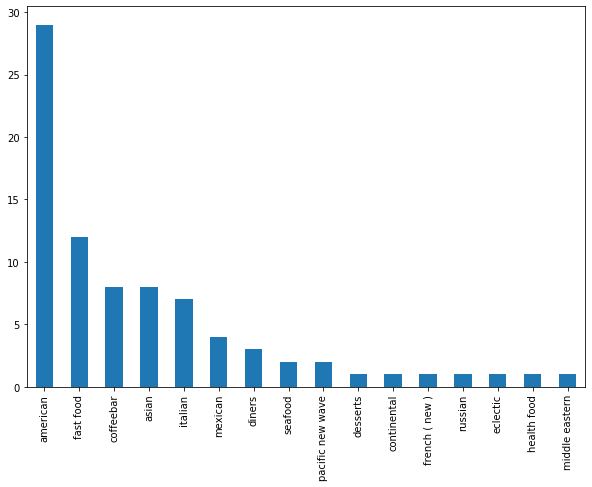

In [18]:
plt.figure(figsize=(10,7))
data2["type"].value_counts().plot.bar()
plt.show()

### what about the city column !

In [171]:
data1["city"].value_counts()

new york             173
san francisco         55
los angeles           40
atlanta               33
las vegas             20
santa monica           6
beverly hills          2
toluca lake            1
brooklyn               1
pacific palisades      1
hollywood              1
los feliz              1
sherman oaks           1
studio city            1
Name: city, dtype: Int64

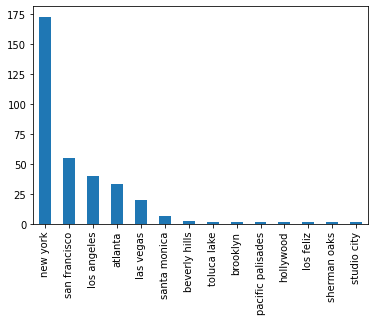

In [172]:
data1["city"].value_counts().plot(kind="bar")

In [22]:
data2["city"].value_counts()

los                17
los angele         11
new york            9
anta monica         6
beverly hill        5
pasadena            4
hollywood           4
venice              3
udio city           2
estwood             2
encino              2
estlake village     2
redondo beach       1
northridge          1
rancho park         1
chinatown           1
mar vista           1
malibu              1
eal beach           1
burbank             1
culver city         1
marina del rey      1
boyle hts           1
century city        1
monterey park       1
long beach          1
hermosa beach       1
Name: city, dtype: int64

#### obviosly los is an abbreviation, may be refer to los angel or los vigas or somthing else,
#### we will not remape it, as it's easy to find similarity matches

### 2- ***Generating pairs***
#### Ideally, we want to generate all possible pairs between both Data Frames.  But, what if we had big Data Frames and ended up having to generate millions if not billions of pairs. It wouldn't prove scalable and could seriously hamper development time. This is where we apply what we call ***blocking or indexing***
#### which creates pairs based on a ***matching column***, which leads to reducing the number of possible pairs. 

In [37]:
# create an indexing object. This essentially is an object we can use to generate pairs from both DataFrames.
indexer = recordlinkage.Index()
indexer.block('type')
pairs = indexer.index(data1, data2)

### The result is a ***pandas multi-index object*** containing pairs of row indices from both DataFrames, which is a fancy way to say it is an array containing possible pairs of indices that makes it much easier to subset DataFrames on. 

In [38]:
pairs

MultiIndex([(  0,  0),
            (  0,  1),
            (  0,  2),
            (  0,  4),
            (  0,  7),
            (  0, 12),
            (  0, 13),
            (  0, 18),
            (  0, 20),
            (  0, 27),
            ...
            (216, 63),
            (216, 66),
            (284, 19),
            (284, 24),
            (284, 63),
            (284, 66),
            (287, 19),
            (287, 24),
            (287, 63),
            (287, 66)],
           length=5766)

#### 3- ***Comparing the DataFrames***
#### it's time to find potential matches. We first start by creating a comparison object which is responsible for assigning different comparison procedures for pairs.
#### Now in order to compute string similarities between pairs of rows for columns that have fuzzy values
#### the similarity cutoff point in the threshold argument, which takes in a value between 0 and 1

#### Finally to compute the matches, we use the compute() function, which takes in the possible pairs, and the two DataFrames in question.

In [41]:
# Create a Compare object
compare_cl = recordlinkage.Compare()

# Find exact matches for pairs of phone
compare_cl.exact('phone', 'phone', label='phone') 
# Find similar matches for pairs of city, name and address
compare_cl.string('city', 'city', threshold=0.8, label='type')
compare_cl.string('name', 'name', threshold=0.8, label="name")
compare_cl.string('address', 'address',threshold=0.8, label="adress")

# Find matches
potential_matches = compare_cl.compute(pairs, data1, data2) 

#### Note that you need to always have ***the same order of DataFrames*** when inserting them as arguments when ***generating pairs***, ***comparing between columns ***, and **computing comparisons**. 

##### The output is a ***multi-index DataFrame***, where ***the first index*** is ***the row index*** from the first DataFrame, and ***the second index*** is a ***list of all row indices*** in the second DataFrame. 
##### The columns are the columns being compared, with values being ***1 for a match***, and **0 for not a match**. 


In [42]:
print(potential_matches)

        phone  type  name  adress
0   0       0   0.0   0.0     0.0
    1       0   0.0   0.0     0.0
    2       0   0.0   0.0     0.0
    4       0   0.0   0.0     0.0
    7       0   0.0   0.0     0.0
...       ...   ...   ...     ...
284 66      0   0.0   0.0     0.0
287 19      0   0.0   0.0     0.0
    24      0   0.0   0.0     0.0
    63      0   0.0   0.0     0.0
    66      0   0.0   0.0     0.0

[5766 rows x 4 columns]


### ***Finding the only pairs we want***
### To find potential matches, we just filter for rows where the sum of row values is higher than a certain threshold.
### here we assign 3 wich means that we need at least 3 features to be match to say the the record is duplicated.


In [43]:
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]
print(matches)

       phone  type  name  adress
0  40      1   1.0   1.0     1.0
1  28      1   1.0   1.0     1.0
2  74      1   1.0   1.0     1.0
3  1       1   1.0   1.0     1.0
4  53      1   1.0   1.0     1.0
8  43      1   1.0   1.0     1.0
9  50      1   1.0   1.0     1.0
13 7       1   1.0   1.0     1.0
14 67      1   1.0   1.0     1.0
17 12      1   1.0   1.0     1.0
20 20      1   1.0   1.0     1.0
21 27      1   1.0   1.0     1.0
5  65      1   1.0   1.0     1.0
7  79      1   1.0   1.0     1.0
12 26      1   1.0   1.0     1.0
18 71      1   1.0   1.0     1.0
6  73      1   1.0   1.0     1.0
10 75      1   1.0   1.0     1.0
11 21      1   1.0   1.0     1.0
16 57      1   1.0   1.0     1.0
19 47      1   1.0   1.0     1.0
15 55      1   1.0   1.0     1.0


In [45]:
duplicate_rows = matches.index.get_level_values(1)

In [46]:
# Finding duplicates in data2
dat1_duplicates = data2[data2.index.isin(duplicate_rows)]
# Finding new rows in data2
data2_new = data2[~data2.index.isin(duplicate_rows)]

In [47]:
# now it's time to link both dataframes
data=data1.append(data2_new)
data.head()

,name,address,city,phone,type
0,arnie morton's of chicago,435 la cienega blv,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd,studio city,8187621221,american
2,campanile,624 la brea ave,los angeles,2139381447,american
3,fenix,8358 n t blvd we,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [48]:
data.shape

(396, 5)

### remember, the shape of data1 is (336, 5), and the shape of data2 is (82, 5)  
### after we link both dataframes using record linkage in data we got it's shape is (396,5) wich means that about 24 record is duplicated in both dataframes and we avoid duplications.